In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SVMSMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif

import warnings
warnings.filterwarnings('ignore')


# 1 Загрузим и выведем информацию для обучения и тестов

In [34]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
number_of_elements = 20000 
train_data = train_data.sample(n=number_of_elements,
                                        replace=False) 
print(train_data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
225973  197075    Male   57                1         35.0                   0   
155623  155148    Male   23                1         28.0                   0   
89340    51827    Male   27                1         33.0                   1   
74719   233116  Female   24                1         15.0                   0   
33098    64523    Male   24                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
7187     70293    Male   73                1         35.0                   1   
221020  337498    Male   53                1         50.0                   0   
21485    64374    Male   23                1         46.0                   1   
78507   152976    Male   34                1          0.0                   0   
207520  470365  Female   29                1         33.0                   1   

       Vehicle_Age Vehicle_

In [35]:
print(test_data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       151069    Male   23                1         41.0                   1   
1       460048  Female   42                1         28.0                   1   
2       362380    Male   47                1         28.0                   1   
3       191116    Male   23                1         41.0                   1   
4       422660    Male   42                1         41.0                   0   
...        ...     ...  ...              ...          ...                 ...   
152857  368806    Male   42                1         35.0                   1   
152858   55749  Female   23                1         32.0                   1   
152859  112077  Female   31                1         29.0                   1   
152860  443675  Female   22                1         29.0                   1   
152861  444659    Male   47                1         13.0                   0   

       Vehicle_Age Vehicle_

# 2 Предварительная обработка данных 

In [36]:
ids = test_data["id"]
key = 'Response'
train_data

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
225973  197075    Male   57                1         35.0                   0   
155623  155148    Male   23                1         28.0                   0   
89340    51827    Male   27                1         33.0                   1   
74719   233116  Female   24                1         15.0                   0   
33098    64523    Male   24                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
7187     70293    Male   73                1         35.0                   1   
221020  337498    Male   53                1         50.0                   0   
21485    64374    Male   23                1         46.0                   1   
78507   152976    Male   34                1          0.0                   0   
207520  470365  Female   29                1         33.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
225973    1-2 Year            Yes         20437.0                 124.0   
155623    < 1 Year             No         22579.0                 152.0   
89340     < 1 Year             No         36618.0                 152.0   
74719     < 1 Year            Yes         33622.0                 151.0   
33098     < 1 Year             No         30084.0                 152.0   
...            ...            ...             ...                   ...   
7187      1-2 Year            Yes         34094.0                 124.0   
221020    1-2 Year            Yes         34363.0                   8.0   
21485     < 1 Year             No         22922.0                 152.0   
78507    > 2 Years            Yes          2630.0                  26.0   
207520    < 1 Year             No         26932.0                 152.0   

        Vintage  Response  
225973      163         0  
155623      176         0  
89340       228         0  
74719       233         0  
33098       245         0  
...         ...       ...  
7187        114         0  
221020      105         0  
21485       185         0  
78507       180         1  
207520      114         0  

[20000 rows x 12 columns]

In [37]:

train_data = pd.get_dummies(train_data)

In [38]:

x = train_data.drop([key], axis=1)
y = train_data[key]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
scaler_2 = StandardScaler()
scaler_2.fit(x_train)
x_train_2 = scaler_2.transform(x_train)
x_test_2 = scaler_2.transform(x_test)

In [39]:
feature_names = list(train_data.columns)[:-1]
sel_mi = SelectKBest(mutual_info_classif, k=8).fit(x, y)
features = list(zip(feature_names, sel_mi.get_support()))
print(features)
useful_features = ['id'] + [i[0] for i in features if i[1] == True]
print(useful_features)
x_new = x[useful_features].copy(deep=True)
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=0.3)
x_train_new = scaler_2.fit_transform(x_train_new)
x_test_new = scaler_2.transform(x_test_new)

x_new.head()



[('id', np.True_), ('Age', np.True_), ('Driving_License', np.False_), ('Region_Code', np.False_), ('Previously_Insured', np.True_), ('Annual_Premium', np.False_), ('Policy_Sales_Channel', np.True_), ('Vintage', np.False_), ('Response', np.False_), ('Gender_Female', np.False_), ('Gender_Male', np.True_), ('Vehicle_Age_1-2 Year', np.True_), ('Vehicle_Age_< 1 Year', np.False_), ('Vehicle_Age_> 2 Years', np.True_), ('Vehicle_Damage_No', np.True_)]
['id', 'id', 'Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Gender_Male', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No']


id      id  Age  Previously_Insured  Policy_Sales_Channel  \
225973  197075  197075   57                   0                 124.0   
155623  155148  155148   23                   0                 152.0   
89340    51827   51827   27                   1                 152.0   
74719   233116  233116   24                   0                 151.0   
33098    64523   64523   24                   1                 152.0   

        Gender_Male  Vehicle_Age_1-2 Year  Vehicle_Age_> 2 Years  \
225973         True                  True                  False   
155623         True                 False                  False   
89340          True                 False                  False   
74719         False                 False                  False   
33098          True                 False                  False   

        Vehicle_Damage_No  
225973              False  
155623               True  
89340                True  
74719               False  
33098                True

# 4 Модели классификаторов с параметрами

In [40]:
models = {
    "Логистическая Регрессия": LogisticRegression(solver="liblinear"),
    "Метод Ближайших Соседей": KNeighborsClassifier(),
    "Наивный Байесовский Классификатор": GaussianNB(),
    "Линейный Дискриминантный Анализ": LinearDiscriminantAnalysis(),
    "Квадратичный Дискриминантный Анализ": QuadraticDiscriminantAnalysis(),
    "Машина Опорных Векторов": SVC()
}

params = {
    "Логистическая Регрессия": {"max_iter": [100],
                                 "solver": ['sag', 'saga', 'newton-cg'],
                                 "n_jobs": [-1]},
    "Метод Ближайших Соседей": {"n_neighbors": list(range(3, 7)),
                                 "weights": ["uniform", "distance"],
                                 "p": [1, 2, 3, 4]},  
    "Наивный Байесовский Классификатор": {},
    "Линейный Дискриминантный Анализ": {"solver":  ["svd", 'lsqr', "eigen"]},
    "Квадратичный Дискриминантный Анализ": {"reg_param": np.linspace(0, 1, num=101)},
    "Машина Опорных Векторов": {"kernel": ['poly'],
                                'probability': [True],
                                 "class_weight": ["balanced"],
                                 "max_iter": [-1]}
}
best_models = {}
for name, model in models.items():
    random_search = GridSearchCV(model, params[name], cv=5, scoring='roc_auc', n_jobs=-1)
    random_search.fit(x_train_new, y_train_new)  
    best_model = random_search.best_estimator_
    best_models[name] = best_model


   

/home/master/Work/Vuz-raboti/.venv/lib64/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/master/Work/Vuz-raboti/.venv/lib64/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/master/Work/Vuz-raboti/.venv/lib64/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/master/Work/Vuz-raboti/.venv/lib64/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing th

In [41]:
print(best_models)

{'Логистическая Регрессия': LogisticRegression(n_jobs=-1, solver='sag'), 'Метод Ближайших Соседей': KNeighborsClassifier(n_neighbors=6, p=1), 'Наивный Байесовский Классификатор': GaussianNB(), 'Линейный Дискриминантный Анализ': LinearDiscriminantAnalysis(), 'Квадратичный Дискриминантный Анализ': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.12)), 'Машина Опорных Векторов': SVC(class_weight='balanced', kernel='poly', probability=True)}


# 5 Применение техники сэмплирования к исходным несбалансированным данным

In [42]:
results = {}

smote = SVMSMOTE(
    sampling_strategy='auto',  
    random_state=1, 
    k_neighbors=5,
    m_neighbors=10,
    svm_estimator = SVC()
)

smoted_x, smoted_y = smote.fit_resample(x_new, y)
for name, model in best_models.items():
    model.fit(smoted_x,  smoted_y)
    y_pred = model.predict_proba(smoted_x)[:,1]
    score = roc_auc_score(smoted_y, y_pred)
    results[name] = score  

print(results)

{'Логистическая Регрессия': np.float64(0.7295620721205422), 'Метод Ближайших Соседей': np.float64(0.9334333452261118), 'Наивный Байесовский Классификатор': np.float64(0.799876839971037), 'Линейный Дискриминантный Анализ': np.float64(0.9460423893998879), 'Квадратичный Дискриминантный Анализ': np.float64(0.9433494266285339), 'Машина Опорных Векторов': np.float64(0.7162845921359848)}


In [43]:
best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]
print("Лучшая модель:", best_model_name)


Лучшая модель: Линейный Дискриминантный Анализ


# 6 Предсказать целевую переменную для тестовой выборки

In [45]:
test_data=pd.get_dummies(test_data)
y_pred = best_model.predict_proba(test_data[useful_features])[:, 1]
submission = pd.DataFrame({'id': ids, 'Response': y_pred})

submission.to_csv('submission.csv', index=False)
print("Файл submission.csv сохранен.")


Файл submission.csv сохранен.


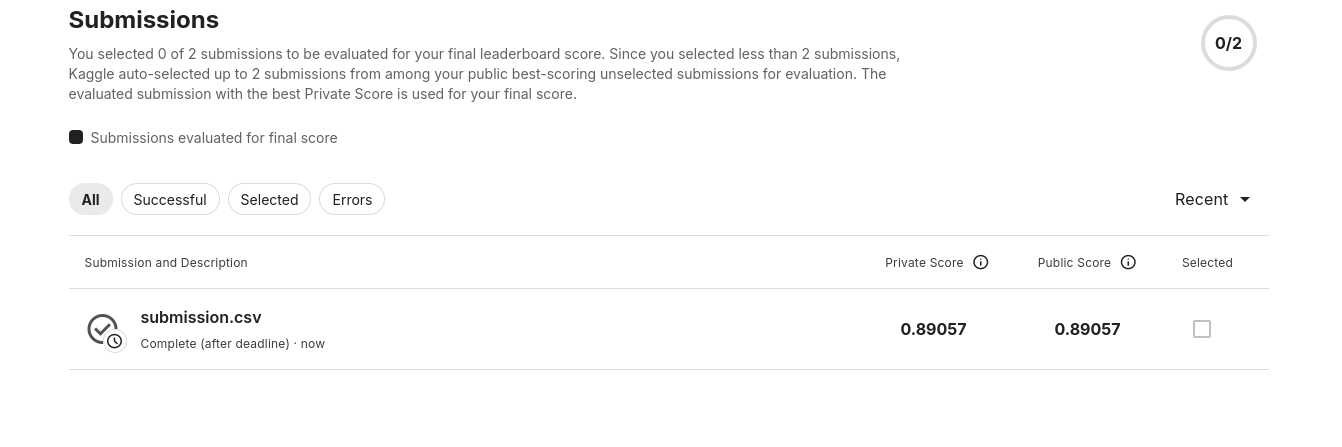

In [46]:
for i in y_pred:
    print(i)

0.003981853916910795
0.11764770778651248
0.5515539064716805
0.0052001615913447015
0.9215620109927706
0.6709145190701824
0.004114076943180476
0.40703661799614543
0.7930988690599382
0.7847080954627697
0.866475090974232
0.003372859595441279
0.5095208025042534
0.09888820362618411
0.0042049000224280535
0.8753122191314345
0.003288211456067283
0.9285807131810175
0.2167278258743505
0.5310758771985467
0.1717116759836826
0.018149490834422705
0.7886433784594438
0.9420990814075902
0.3547305789867816
0.009581660473332022
0.8640835789777909
0.01557109517518107
0.27316586873179743
0.6902073476751274
0.004602725068534254
0.002863029821313878
0.9059169738486372
0.011135325857952056
0.23403632816782333
0.5255936166195105
0.9060984151461176
0.002200400079309486
0.02873562491740512
0.006306891846060573
0.6225375057643301
0.38482715602753353
0.8389080213657083
0.6090168148819272
0.14192412772131877
0.033015717869720684
0.0012609671023887754
0.06970905409888113
0.8878994030120152
0.7208269830329791
0.034041